In [1]:
import pandas as pd

In [18]:
import numpy as np
mes = pd.read_csv('/home/diego/weather-control/data/processed/35.csv', sep=',', decimal='.', header='infer')
mes['fecha'] = pd.to_datetime(mes['fecha'], format= "%Y-%m-%d %H:%M:%S")
mes.set_index('fecha', drop=True, inplace=True)
#mes = mes.loc[mes.index <='2019-06-29']
mes=mes.resample('1H').mean()
mes.loc[mes.index == '2021-08-14 23:00:00', 'hr'] = np.nan
mes

,precipitacion,temperatura,hr
fecha,,,
2018-01-01 00:00:00,0.0,4.05,70.5
2018-01-01 01:00:00,0.0,5.20,63.0
2018-01-01 02:00:00,0.0,5.60,63.0
2018-01-01 03:00:00,0.0,5.90,57.5
2018-01-01 04:00:00,0.0,5.50,60.5
...,...,...,...
2021-08-14 20:00:00,0.0,34.25,25.0
2021-08-14 21:00:00,0.0,27.15,48.0
2021-08-14 22:00:00,0.0,23.55,63.0


In [19]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp_mean = IterativeImputer(random_state=0)
idf=imp_mean.fit_transform(mes)
idf = pd.DataFrame(idf, columns=mes.columns)
idf
# mes['temperatura'] = idf['temperatura'].values
# mes['hr'] = idf['hr'].values
# mes['precipitacion'] = idf['precipitacion'].values
# del idf
        

TypeError: float() argument must be a string or a number, not 'NAType'

In [7]:
dosmes = pd.read_csv('/home/diego/weather-control/data/processed/1289.csv', sep=',', decimal='.', header='infer')
dosmes['fecha'] = pd.to_datetime(dosmes['fecha'], format= "%Y-%m-%d %H:%M:%S")
dosmes.set_index('fecha', drop=True, inplace=True)
#dosmes = dosmes.loc[(dosmes.index <='2019-07-29')&(dosmes.index >= '2019-05-28')]
dosmes.columns = ['t', 'r', 'p']
dosmes

,t,r,p
fecha,,,
2018-01-01 00:00:00,5.7,64.0,0.0
2018-01-01 01:00:00,4.7,71.0,0.0
2018-01-01 02:00:00,5.1,71.0,0.0
2018-01-01 03:00:00,6.4,64.0,0.0
2018-01-01 04:00:00,6.0,66.0,0.0
...,...,...,...
2021-08-14 20:00:00,36.5,31.0,0.0
2021-08-14 21:00:00,29.6,50.0,0.0
2021-08-14 22:00:00,25.0,64.0,0.0


In [8]:
mes=mes.resample('1H').mean()
dosmes=dosmes.resample('1H').mean()

In [9]:
mes.join(dosmes, how='inner')

,precipitacion,temperatura,hr,t,r,p
fecha,,,,,,
2018-01-01 00:00:00,0.0,4.05,70.5,5.7,64.0,0.0
2018-01-01 01:00:00,0.0,5.20,63.0,4.7,71.0,0.0
2018-01-01 02:00:00,0.0,5.60,63.0,5.1,71.0,0.0
2018-01-01 03:00:00,0.0,5.90,57.5,6.4,64.0,0.0
2018-01-01 04:00:00,0.0,5.50,60.5,6.0,66.0,0.0
...,...,...,...,...,...,...
2021-08-14 20:00:00,0.0,34.25,25.0,36.5,31.0,0.0
2021-08-14 21:00:00,0.0,27.15,48.0,29.6,50.0,0.0
2021-08-14 22:00:00,0.0,23.55,63.0,25.0,64.0,0.0


In [28]:
dosmes.head(20)

,temperatura,hr,precipitacion
fecha,,,
2019-05-28 00:00:00,12.4,74.0,0.0
2019-05-28 01:00:00,11.0,80.0,0.0
2019-05-28 02:00:00,9.6,85.0,0.0
2019-05-28 03:00:00,9.2,85.0,0.0
2019-05-28 04:00:00,9.1,87.0,0.0
2019-05-28 05:00:00,9.1,88.0,0.0
2019-05-28 06:00:00,9.4,84.0,0.0
2019-05-28 07:00:00,10.1,76.0,0.0
2019-05-28 08:00:00,11.2,71.0,0.0


In [22]:
from sklearn.preprocessing import PowerTransformer, QuantileTransformer
import pickle
import pandas as pd

In [20]:
with open('/home/diego/weather-control/experiments/experimentoD1/data/dataset_estaciones.pickle', 'rb') as h:
    dfs = pickle.load(h)

In [21]:
d = pd.concat([_.loc[:, ['precipitacion', 'nwp_precipitacion']] for _ in dfs], axis=0)
d = d * 19.7
d.describe()

,precipitacion,nwp_precipitacion
count,153267.000000,153267.000000
mean,0.020244,0.051495
std,0.183508,0.355164
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,19.700000,23.600000


In [15]:
pt=QuantileTransformer()
g = pt.fit_transform(d)
g = pd.DataFrame(g, columns=d.columns)
g.describe()

,precipitacion,nwp_precipitacion
count,153267.000000,153267.000000
mean,0.000552,0.001927
std,0.002713,0.007488
min,-0.000000,-0.000000
25%,-0.000000,-0.000000
50%,0.000000,0.000000
75%,-0.000000,-0.000000
max,0.014143,0.031207


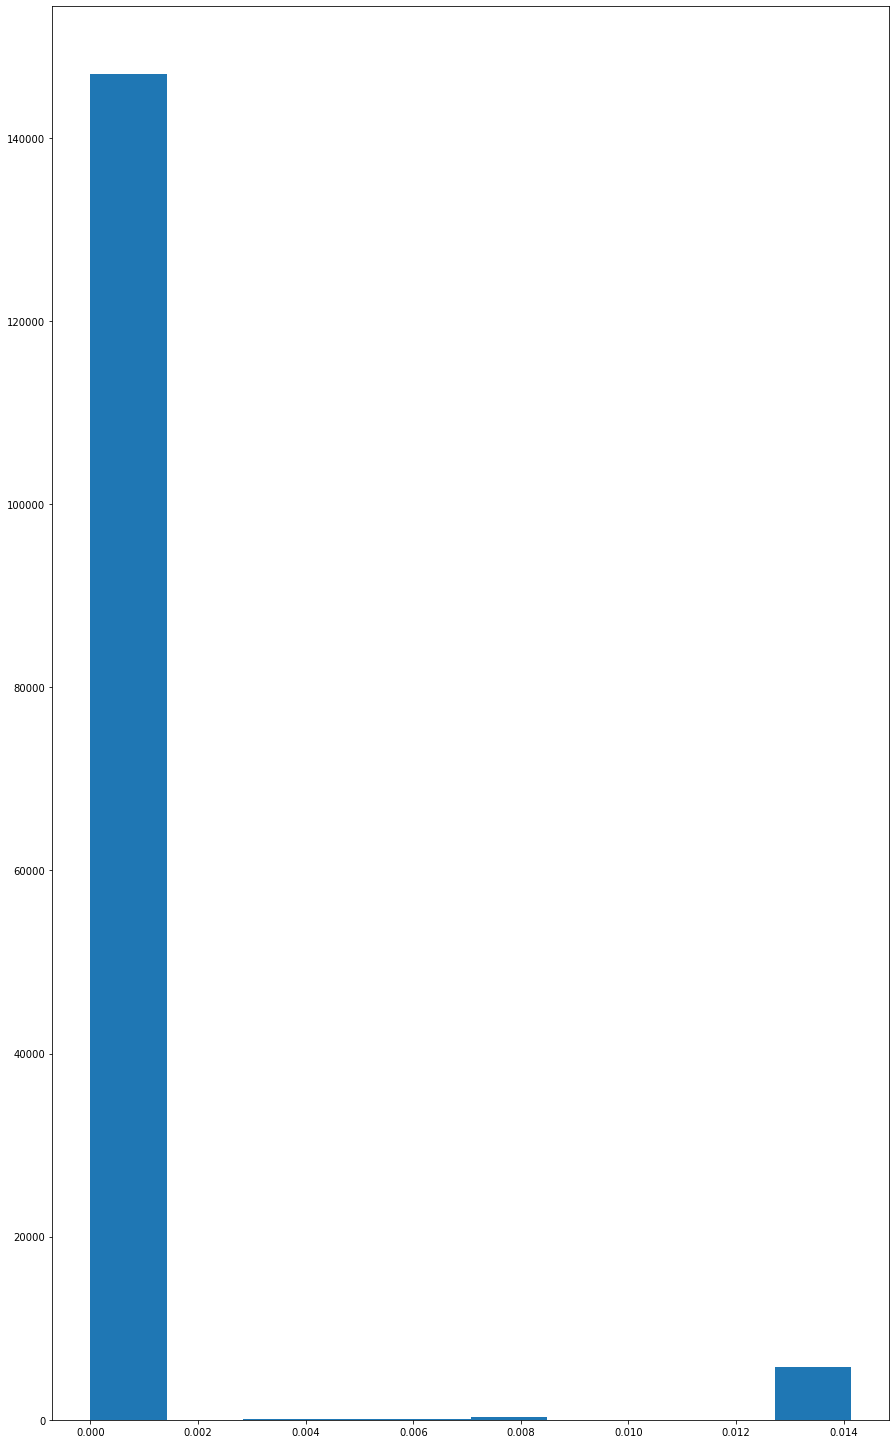

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,26))
plt.hist(g.precipitacion)
plt.show()